<a href="https://colab.research.google.com/github/sirinao/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

Project Title : Netflix Tv shows and Movies Clustering

Project Type - Unsupervised ML

Contribution - Individual

Name - Siri Chandana Tammineni

# **Project Summary -**

##**Context:**
This dataset consists of tv shows and movies available on Netflix as of 2019.   The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##**Object :**
This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# **GitHub Link -**
https://github.com/sirinao/Netflix-Movies-and-TV-Shows-Clustering

# **General Guidelines** : -  
1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


#**Know Your Data**

##**Importing the Libraries**

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Dataset Loading**

In [ ]:
#Loading the data

netflix = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Data/NC/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

##**Dataset First View**

In [ ]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##**Description:**
Show_id : Unique ID for every Movie / Tv Show

Type : Identifier - A Movie or TV Show

Title : Title of the Movie / Tv Show

Director : Director of the Movie

Cast : Actors involved in the movie / show

Country : Country where the movie / show was produced

Date_added : Date it was added on Netflix

Release_year : Actual Releaseyear of the movie / show

Rating : TV Rating of the movie / show

Duration : Total Duration - in minutes or number of seasons

Listed_in : Genere

Description: The Summary description

##**Dataset Information**

In [ ]:
#check information about all columns

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##**Dataset Rows & Columns count**

In [ ]:
#check no.of rows and columns

netflix.shape

(7787, 12)

##**Missing Values/Null Values**

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# describe the numerical dataset
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
#checking duplicated values

netflix.duplicated().sum()

0

##**Data Cleaning**

In [ ]:
#Removing the null values in 'Date added' column

netflix = netflix[netflix['date_added'].notna()]

In [ ]:
netflix.shape

(7777, 12)

In [ ]:
#filling the null values in 'director','cast' and 'country' column

netflix['director'].fillna(value='other',inplace=True)
netflix['cast'].fillna(value='none',inplace=True)
netflix['country'].fillna(value='other',inplace=True)

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#Removing the null values in 'rating' column

netflix = netflix[netflix['rating'].notna()]

In [ ]:
netflix.shape

(7770, 12)

In [ ]:
# change data-types of columns

netflix["date_added"] = pd.to_datetime(netflix['date_added'])

In [ ]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [ ]:
# Making seperate column for published_day, month and year of upload

netflix['year'] = netflix['date_added'].dt.year
netflix['month'] = netflix['date_added'].dt.month
netflix['published_day'] = netflix["date_added"].dt.day_name()

In [ ]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,published_day
0,s1,TV Show,3%,other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Friday
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Friday


In [ ]:
#Dropping the 'date_added' column

netflix = netflix.drop(columns = ['date_added'])

In [ ]:
netflix.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,published_day
0,s1,TV Show,3%,other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Friday
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Friday


In [ ]:
#Dropping the 'show_id' column

netflix = netflix.drop(columns = ['show_id'])

##**Exploratory Data And Visualization**

<Axes: xlabel='type', ylabel='count'>

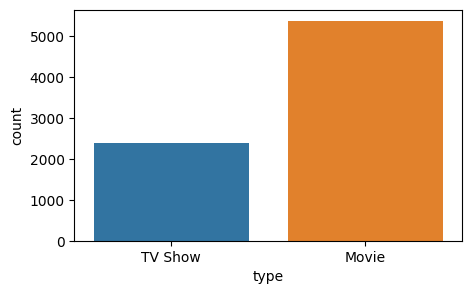

In [ ]:
#distribustion of the type column

plt.figure(figsize=(5,3))
sns.countplot(data = netflix, x='type')

- Count of movies large compared the Tv shows according the data

<Axes: xlabel='rating', ylabel='count'>

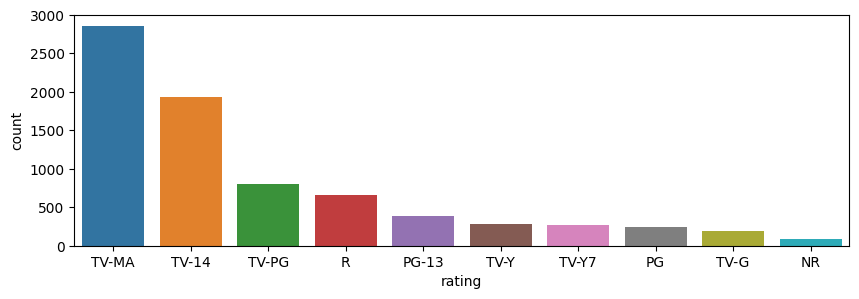

In [ ]:
#distribustion of the rating column

plt.figure(figsize=(10,3))
sns.countplot(data = netflix, x='rating',order=netflix['rating'].value_counts().index[0:10])

##**Ratings:**

**TV-MA** : Mature Audience

**TV-14** : Parents Strongly Cautioned

**TV-PG** : Parental Guidance Suggested

**PG 13** : content suitable for people aged 13 and above

**TV-Y** : All Children

**TV-Y7** : Directed to Older Children

**TV-G** : General Audience

**NR** : Non Rated

<Axes: xlabel='rating', ylabel='count'>

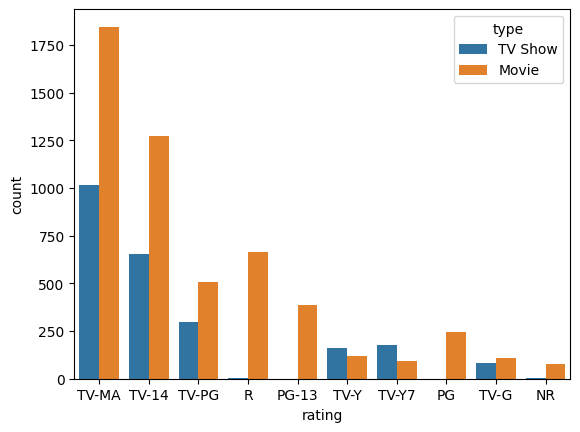

In [ ]:
#'Type' vs 'rating' distribution

sns.countplot(data = netflix, x='rating',hue='type',order=netflix['rating'].value_counts().index[0:10])

In [ ]:
net = netflix.copy()

In [ ]:
net.drop(net[net['director'] == 'other'].index, inplace=True)

In [ ]:
TVdirectors = net[net['type'] == 'TV Show']['director'].value_counts()

<Axes: >

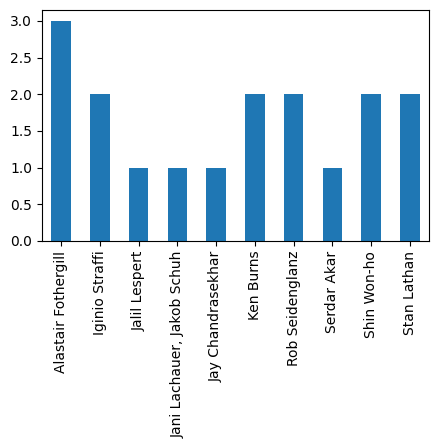

In [ ]:
#top 10 Tv show directors

top10tv = TVdirectors[:10]
top10tv.sort_index(inplace =True)
plt.figure(figsize=(5,3))
top10tv.plot(kind = 'bar')

<Axes: >

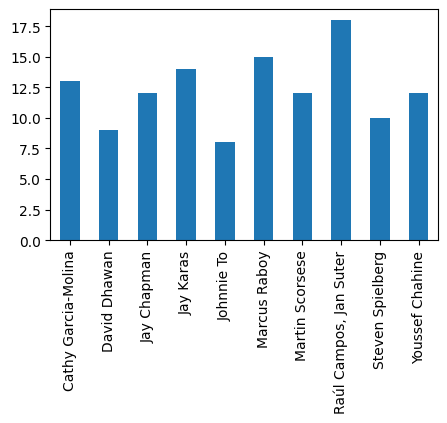

In [ ]:
#top 10 Movie directors

moviedirectors = net[net['type'] == 'Movie']['director'].value_counts()

top10movie = moviedirectors[:10]
top10movie.sort_index(inplace =True)
plt.figure(figsize=(5,3))
top10movie.plot(kind = 'bar')

<Axes: xlabel='year', ylabel='count'>

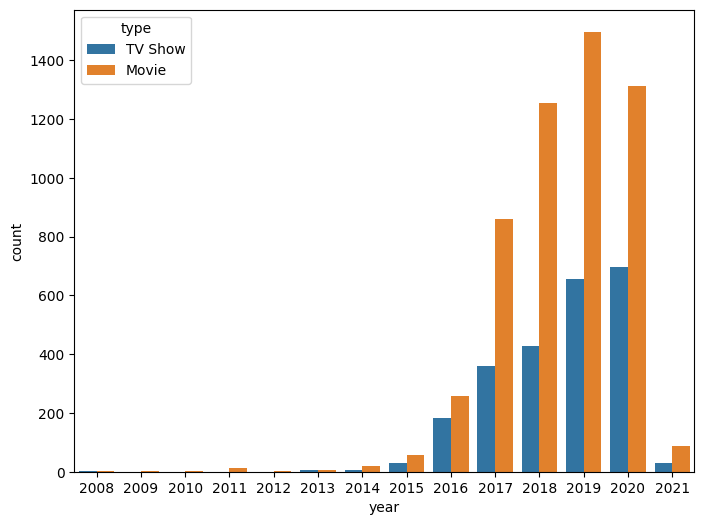

In [ ]:
#Type Vs Year
plt.figure(figsize=(8,6))
sns.countplot(data=netflix, x="year", hue="type")

- In 2019 the movie count was higher than other years, while 2020 has movre tv shows

<Axes: xlabel='month', ylabel='count'>

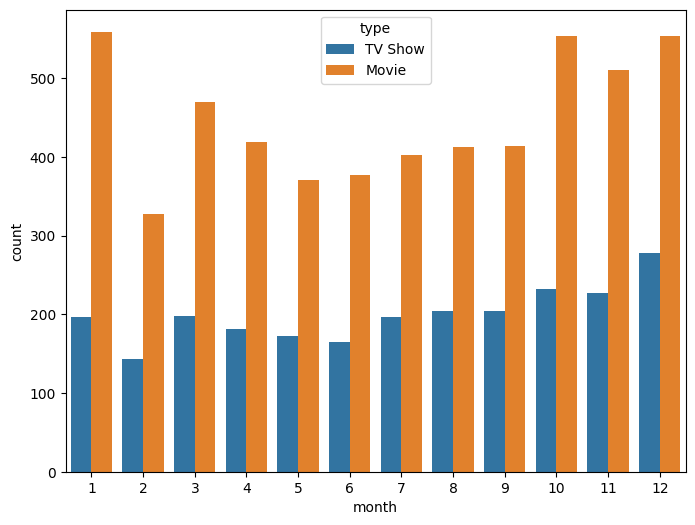

In [ ]:
#Type Vs Month

plt.figure(figsize=(8,6))
sns.countplot(data=netflix, x="month", hue="type")

-The release of movies high in January, October and december. They are comparitively close. while Tv shows are released more in Deceber.

In [ ]:
# extrcating actors from the cast column and creating actor column

actor=[]
for i in netflix['cast']:
  actor.append(i.split(',')[0])

netflix['actor'] = actor

In [ ]:
#Top 10 movie actors

topmovieactor = netflix[netflix['type'] == 'Movie']['actor'].value_counts()[1:10]

<Axes: >

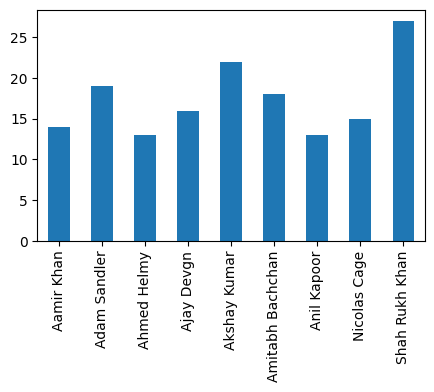

In [ ]:
# ploting Top 10 movie actors

topmovieactor.sort_index(inplace =True)
plt.figure(figsize=(5,3))
topmovieactor.plot(kind = 'bar')

<Axes: >

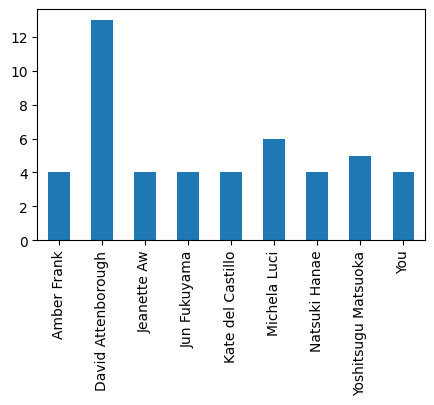

In [ ]:
#Top 10 Tv show actors

topTVactor = netflix[netflix['type'] == 'TV Show']['actor'].value_counts()[1:10]
topTVactor.sort_index(inplace =True)
plt.figure(figsize=(5,3))
topTVactor.plot(kind = 'bar')

In [ ]:
#Top 10 genres in TV shows
TVgenre = netflix[netflix['type'] == 'TV Show']['listed_in'].value_counts()

<Axes: >

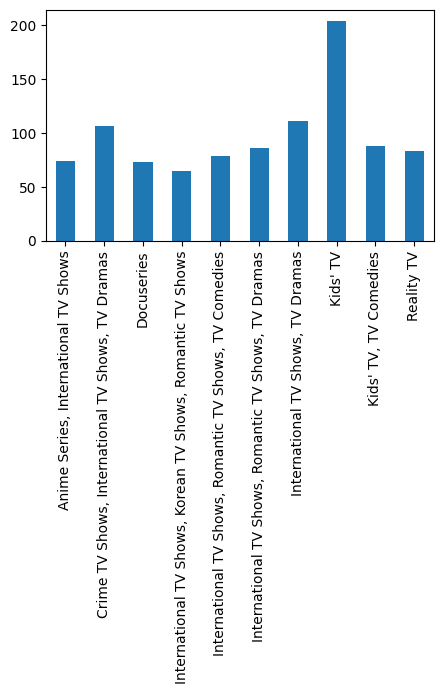

In [ ]:
#plotting Top 10 genres in TV shows
top10genre = TVgenre[:10]
top10genre.sort_index(inplace =True)
plt.figure(figsize=(5,3))
top10genre.plot(kind = 'bar')

<Axes: >

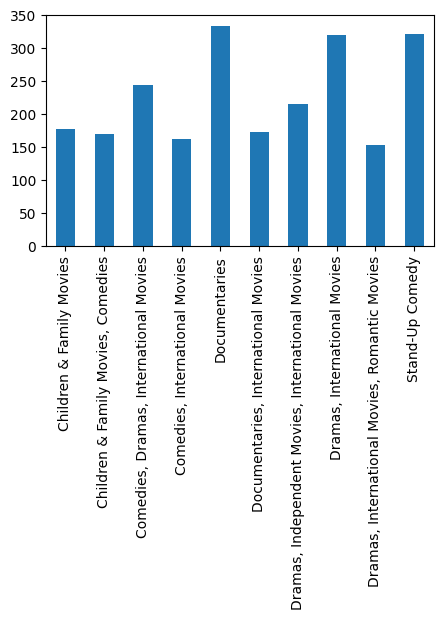

In [ ]:
#Top 10 genres in movies

moviegenre = netflix[netflix['type'] == 'Movie']['listed_in'].value_counts()
top10moviegenre = moviegenre[:10]
top10moviegenre.sort_index(inplace =True)
plt.figure(figsize=(5,3))
top10moviegenre.plot(kind = 'bar')

<Axes: >

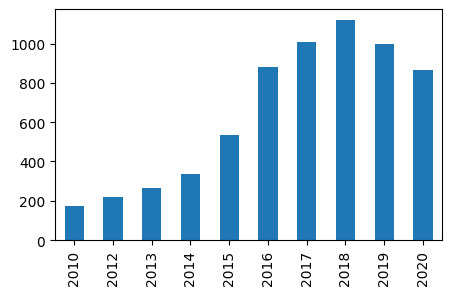

In [ ]:
tenyears = netflix['release_year'].value_counts()
past10years = tenyears[:10]
past10years.sort_index(inplace =True)
plt.figure(figsize=(5,3))
past10years.plot(kind = 'bar')

<Axes: >

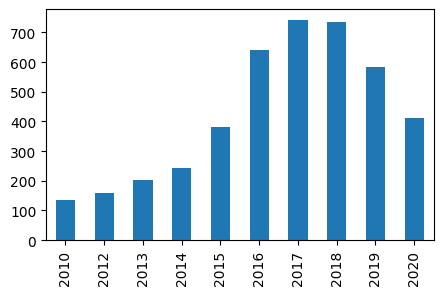

In [ ]:
tenyearsmovie = netflix[netflix['type'] == 'Movie']['release_year'].value_counts()
past10yearsmovie = tenyearsmovie[:10]
past10yearsmovie.sort_index(inplace =True)
plt.figure(figsize=(5,3))
past10yearsmovie.plot(kind = 'bar')

<Axes: >

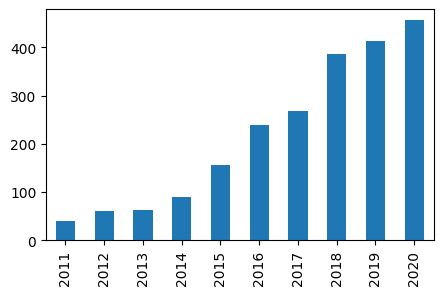

In [ ]:
tenyearsTV = netflix[netflix['type'] == 'TV Show']['release_year'].value_counts()
past10yearsTV = tenyearsTV[:10]
past10yearsTV.sort_index(inplace =True)
plt.figure(figsize=(5,3))
past10yearsTV.plot(kind = 'bar')

<Axes: >

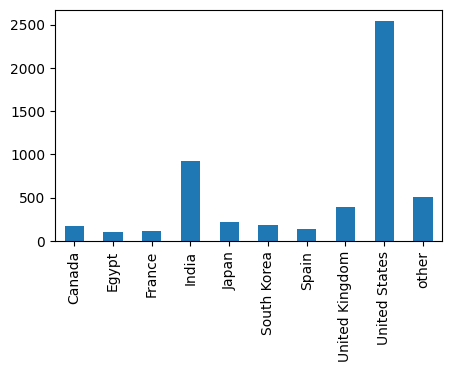

In [ ]:
#Top 10 countrys

topcountry = netflix['country'].value_counts()
top10 = topcountry[:10]
top10.sort_index(inplace =True)
plt.figure(figsize=(5,3))
top10.plot(kind = 'bar')

<Axes: >

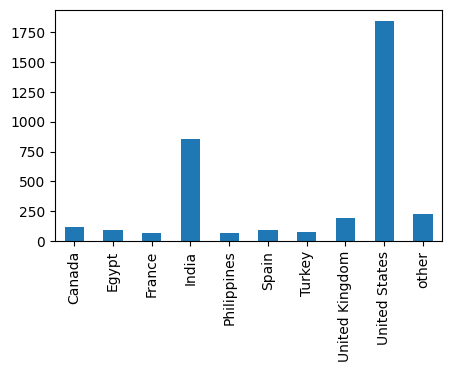

In [ ]:
#Type (movie) vs Country

county_movie = netflix[netflix['type'] == 'Movie']['country'].value_counts()
movie_country = county_movie[:10]
movie_country.sort_index(inplace =True)
plt.figure(figsize=(5,3))
movie_country.plot(kind = 'bar')

<Axes: >

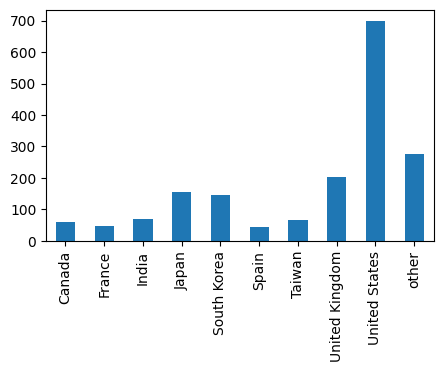

In [ ]:
#Type (Tv show) vs Country

county_TV = netflix[netflix['type'] == 'TV Show']['country'].value_counts()
TV_country = county_TV[:10]
TV_country.sort_index(inplace =True)
plt.figure(figsize=(5,3))
TV_country.plot(kind = 'bar')

<Axes: xlabel='country', ylabel='count'>

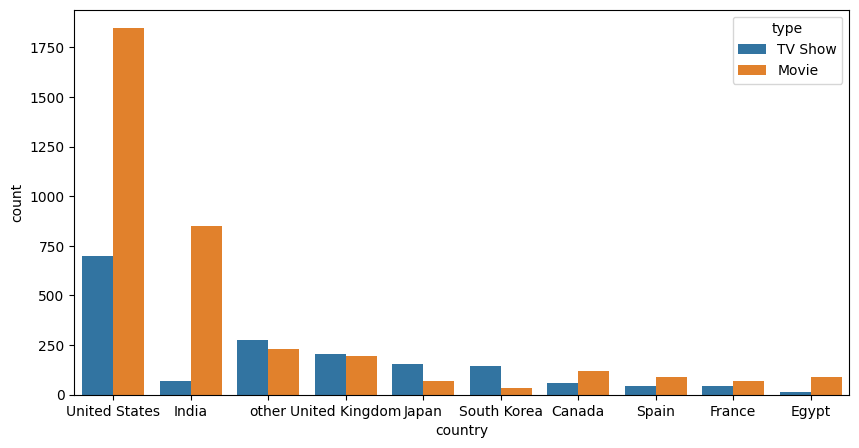

In [ ]:
#Type vs Country

plt.figure(figsize=(10,5))
sns.countplot(data = netflix, x='country',hue='type',order=netflix['country'].value_counts().index[0:10])

##**Removing Stop words and Lower Casing**

In [ ]:
#converting the string of words in the description column into list of words
a = []
for i in netflix['description']:
  a.append(i.split(' '))
netflix['text'] = a

#joining the list of words in the column text to sentence
netflix['text']= netflix['text'].apply(lambda x: " ".join(x))

In [ ]:
#changing the text column to lower case

netflix['text']= netflix['text'].apply(lambda x: x.lower())

In [ ]:
stop = stopwords.words('english')

In [ ]:
#removing the stop words

netflix['text'] = netflix['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

##**Removing Punctuations**

In [ ]:
#removing the punctuations in the text column

netflix["text"] = netflix['text'].str.replace('[^\w\s]','')

In [ ]:
netflix.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,published_day,actor,text
0,TV Show,3%,other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Friday,João Miguel,future elite inhabit island paradise far crowd...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Friday,Demián Bichir,devastating earthquake hits mexico city trappe...


##**Text Vectorization**

In [ ]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)

# fit the vectorizer using the text data
tfidf.fit(netflix['text'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary))

10000


In [ ]:
# convert vector into array form for clustering

vector = tfidf.transform(netflix['text']).toarray()

In [ ]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##**Dimensionality Reduction**

In [ ]:
# using PCA to reduce dimensionality

pca = PCA(n_components=4000,random_state=42)
pca.fit(vector)

PCA(n_components=4000, random_state=42)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [ ]:
# transformed features

x = pca.transform(vector)

x.shape

(7770, 4000)

#**Model Implementation**

Cluster analysis finds the commonalities between the data objects and categorizes them as per the presence and absence of those commonalities.

##**K-Means Clustering**

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

- We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

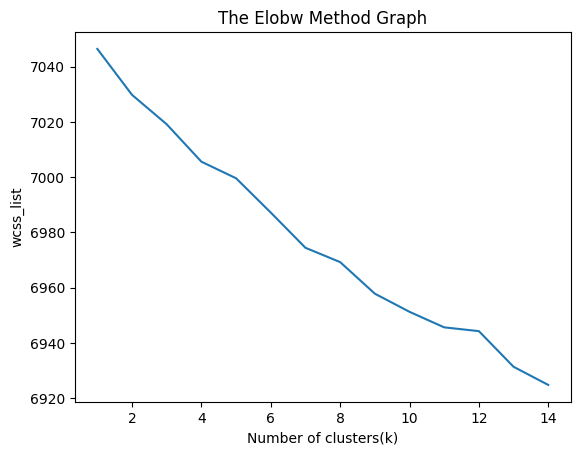

In [ ]:
# Elbow method to find the optimal value of k
wcss= []

#Using for loop for iterations from 1 to 15.
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,15):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=42)
    model.fit(x)
    y1 = model.predict(x)
    score = silhouette_score(x,y1)
    sill.append(score)

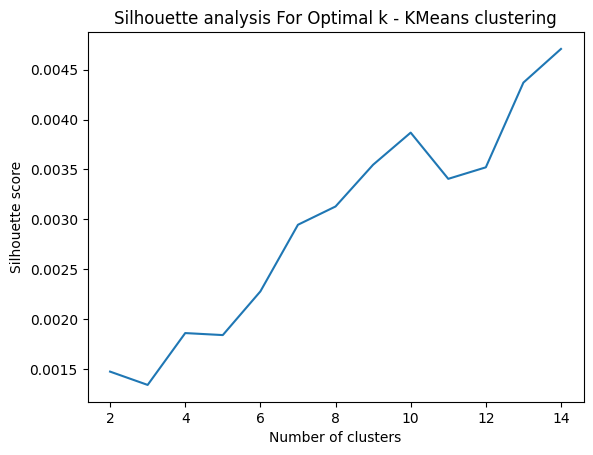

In [ ]:
plt.plot(range(2,15), sill)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 6 clusters

kmeans = KMeans(n_clusters=6,init='k-means++',random_state=42)
kmeans.fit(x)

KMeans(n_clusters=6, random_state=42)

In [ ]:
# Evaluation metrics - distortion, Silhouette score

kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6987.16278562902, 0.0022790156092307675)


In [ ]:
netflix['kmeans_cluster'] = kmeans.labels_

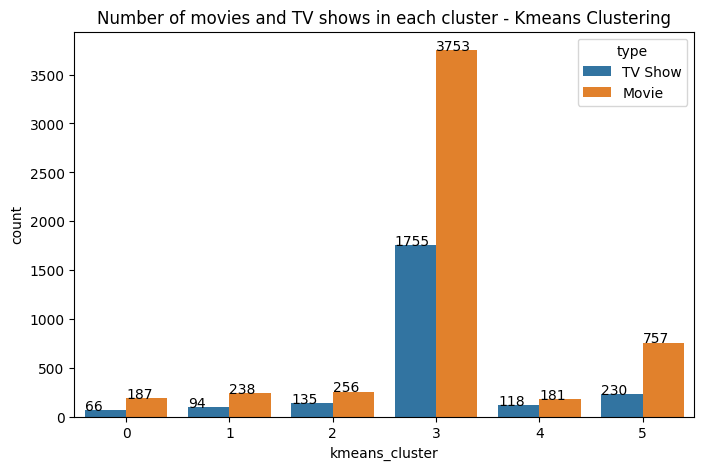

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=netflix, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

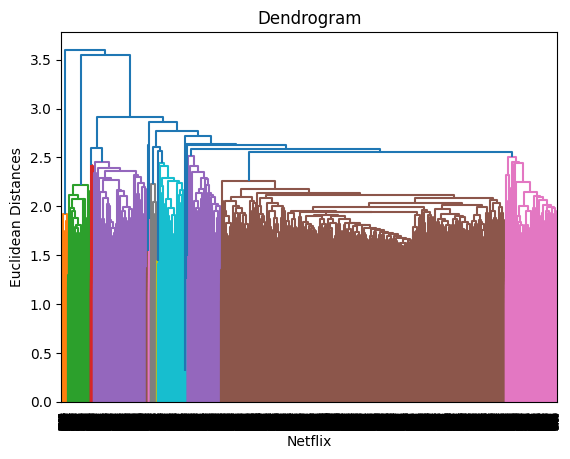

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix')
plt.ylabel('Euclidean Distances')
plt.show()
plt.axhline(y= 4, color='r', linestyle='--')

##**Agglomerative Hierarchical Clustering**

Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive.

Here we are taking Agglomerative clustering. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.


In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [ ]:
netflix['hierarchical_cluster'] = hc.labels_

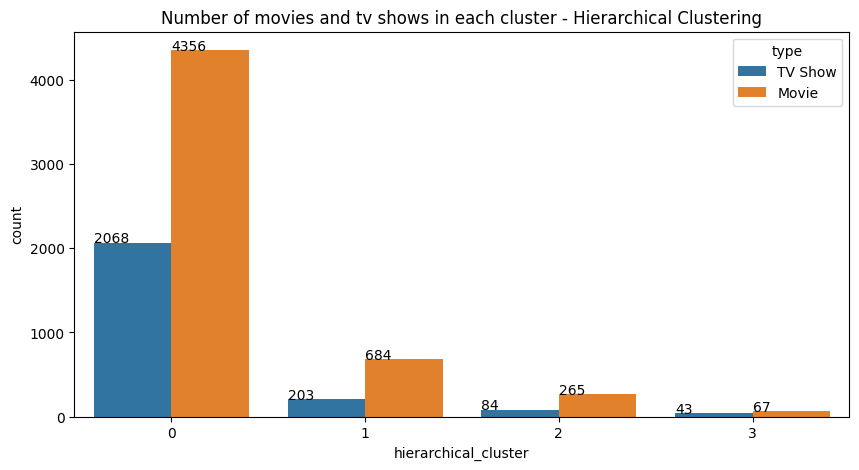

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=netflix, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

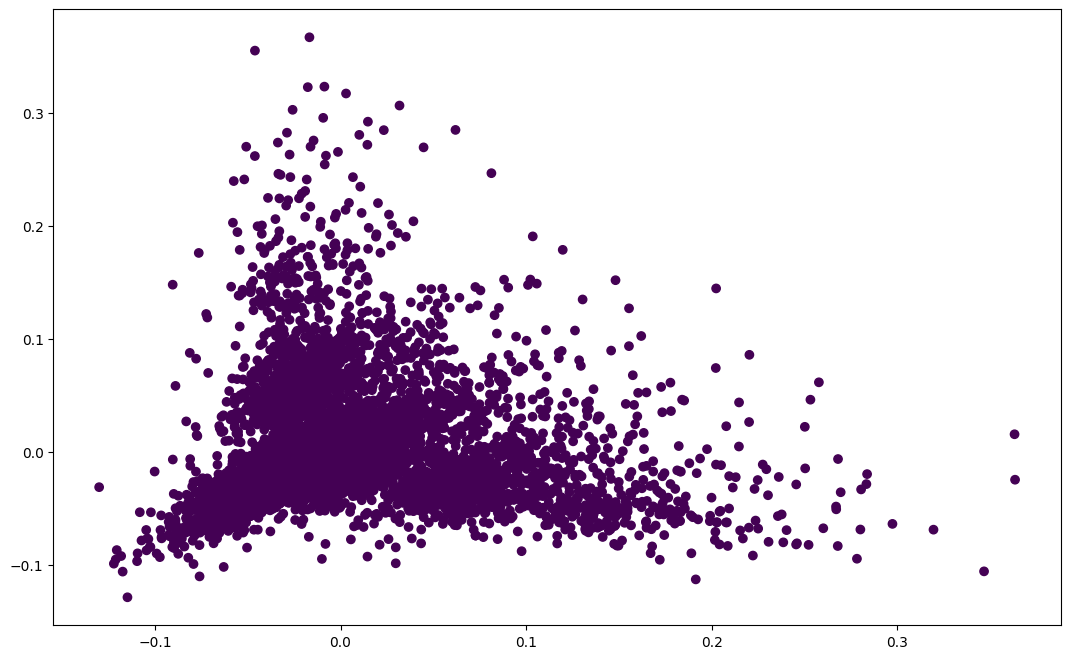

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(x)
plt.figure(figsize=(13,8))
plt.scatter(x[:,0], x[:,1], c=y_pred)

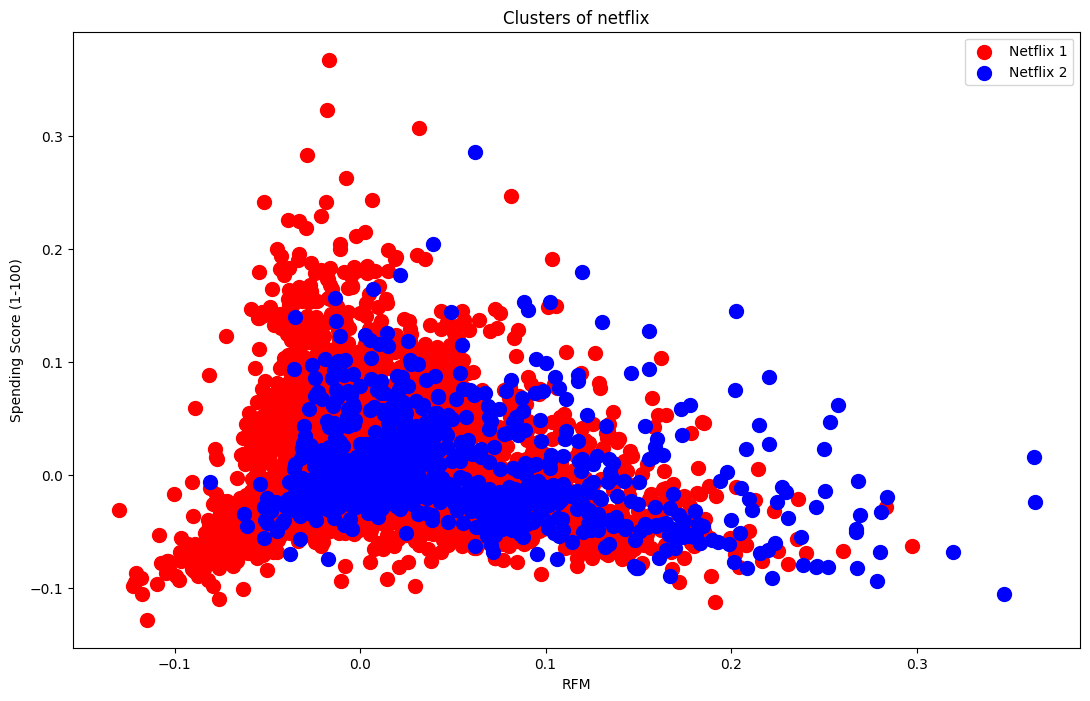

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Netflix 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Netflix 2')

plt.title('Clusters of netflix')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#**Conclusion:**

In this project, we tackled a text clustering issue where we had to categorize Netflix shows into specific clusters such that the shows within a cluster are similar to one another and the shows in different clusters are dissimilar to one another.

- We delt with missing values and duplicated values in the data.

- we see that the movies are more than the the tv shows in the data.

- We check top 10 in all the columns.

- We see that the movies and tv shows are released more in december. and views prefer more Tv-MA rating for both Tv shows and movies.

- The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes. 10000 attributes in total were created by TFIDF vectorization.

- The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

- Utilizing the K-Means Clustering algorithm, we first constructed clusters, and the optimal number of clusters was determined to be 6. The elbow method and Silhouette score analysis were used to get this.

- The Agglomerative clustering algorithm was then used to create clusters, and the optimal number of clusters was determined to be 4. This was obtained after visualizing the dendrogram.